# Imports

In [1]:
import logging
import os

import pandas as pd

import core.config.config_ as cconconf
import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint
import helpers.hs3 as hs3
import im_v2.ccxt.data.client as icdcl
import im_v2.common.universe as ivcu
import research_amp.cc.statistics as ramccsta
import research_amp.cc.volume as ramccvol

In [2]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

AM_AWS_PROFILE = "am"

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-46fcffda-364f-4de0-b0e1-abe69933f58a.json'
>>ENV<<: is_inside_container=True: code_version=1.0.6, container_version=1.0.6, is_inside_docker=True, is_inside_ci=False, CI_defined=True, CI=''
>>ENV<<: AM_AWS_PROFILE=True AM_ECR_BASE_PATH=True AM_S3_BUCKET=True AM_TELEGRAM_TOKEN=True AWS_ACCESS_KEY_ID=False AWS_DEFAULT_REGION=False AWS_SECRET_ACCESS_KEY=False GH_ACTION_ACCESS_TOKEN=True
# Git
    branch_name='CMTask922_refactor_ccxt_clients'
    hash='87aafc12f'
    # Last commits:
      *   87aafc12f Grisha   Merge branch 'master' into CMTask922_refactor_ccxt_clients        ( 7 minutes ago) Fri Jan 14 12:43:55 2022  (HEAD -> CMTask922_refactor_ccxt_clients, origin/CMTask922_refactor_ccxt_clients)
      |\  
      | * a560380c1 DanilYachmenev CmTask949: remove data_type from CCXT clients (#958)              (17 minutes ago) Fri Jan 14 12:33:39 2022  (origin/master, origin/HEAD)

# Config

In [3]:
def get_cmtask260_config() -> cconconf.Config:
    """
    Get task260-specific config.
    """
    config = cconconf.Config()
    # Load parameters.
    config.add_subconfig("load")
    config["load"]["aws_profile"] = AM_AWS_PROFILE
    config["load"]["data_dir"] = os.path.join(
        hs3.get_s3_bucket_path(AM_AWS_PROFILE), "data"
    )
    # Data parameters.
    config.add_subconfig("data")
    config["data"]["universe_version"] = "v03"
    config["data"]["vendor"] = "CCXT"
    # Column names.
    config.add_subconfig("column_names")
    config["column_names"]["volume"] = "volume"
    config["column_names"]["currency_pair"] = "currency_pair"
    config["column_names"]["exchange"] = "exchange_id"
    config["column_names"]["close"] = "close"
    return config


config = get_cmtask260_config()
print(config)

load:
  aws_profile: am
  data_dir: s3://alphamatic-data/data
data:
  universe_version: v03
  vendor: CCXT
column_names:
  volume: volume
  currency_pair: currency_pair
  exchange: exchange_id
  close: close


# Load the data

In [4]:
vendor_universe = ivcu.get_vendor_universe(
    config["data"]["vendor"],
    version=config["data"]["universe_version"],
    as_full_symbol=True,
)
vendor_universe

['binance::ADA_USDT',
 'binance::AVAX_USDT',
 'binance::BNB_USDT',
 'binance::BTC_USDT',
 'binance::DOGE_USDT',
 'binance::EOS_USDT',
 'binance::ETH_USDT',
 'binance::LINK_USDT',
 'binance::SOL_USDT',
 'ftx::BNB_USDT',
 'ftx::BTC_USDT',
 'ftx::DOGE_USDT',
 'ftx::ETH_USDT',
 'ftx::LINK_USDT',
 'ftx::SOL_USDT',
 'ftx::XRP_USDT',
 'gateio::ADA_USDT',
 'gateio::AVAX_USDT',
 'gateio::BNB_USDT',
 'gateio::BTC_USDT',
 'gateio::DOGE_USDT',
 'gateio::EOS_USDT',
 'gateio::ETH_USDT',
 'gateio::FIL_USDT',
 'gateio::LINK_USDT',
 'gateio::SOL_USDT',
 'gateio::XRP_USDT',
 'kucoin::ADA_USDT',
 'kucoin::AVAX_USDT',
 'kucoin::BNB_USDT',
 'kucoin::BTC_USDT',
 'kucoin::DOGE_USDT',
 'kucoin::EOS_USDT',
 'kucoin::ETH_USDT',
 'kucoin::FIL_USDT',
 'kucoin::LINK_USDT',
 'kucoin::SOL_USDT',
 'kucoin::XRP_USDT']

In [5]:
compute_daily_cumul_volume_ = lambda data: ramccvol.get_daily_cumul_volume(
    data, config, is_notional_volume=False
)

cumul_daily_volume = ramccsta.compute_stats_for_universe(
    vendor_universe, config, compute_daily_cumul_volume_
)

Reading CCXT data for exchange id='binance', currencies='ADA_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/ADA_USDT.csv.gz'...
Removed 48775 / 1617480 = 3.02% rows
Index length increased by 53295 = 1622000 - 1568705
Reading CCXT data for exchange id='binance', currencies='AVAX_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/AVAX_USDT.csv.gz'...
Removed 26890 / 516274 = 5.21% rows
Index length increased by 28114 = 517498 - 489384
Reading CCXT data for exchange id='binance', currencies='BNB_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/BNB_USDT.csv.gz'...
Removed 1253 / 1617775 = 0.08% rows
Index length increased by 5773 = 1622295 - 1616522
Reading CCXT data for exchange id='binance', currencies='BTC_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/BTC_USDT.csv.gz'...
Removed 210 / 1615122 = 0.01% rows
Index length increased by 4729 = 1619641 - 1614912
Reading CCXT data for exchange id='binance', currencies='DOGE_USDT

Removed 2729 / 60509 = 4.51% rows
Index length increased by 2729 = 60509 - 57780
Reading CCXT data for exchange id='kucoin', currencies='XRP_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/XRP_USDT.csv.gz'...
Removed 196131 / 1357381 = 14.45% rows
Index length increased by 303138 = 1464388 - 1161250


In [14]:
_LOG.info(
    "The number of (exchanges, currency pairs) =%s", cumul_daily_volume.shape[0]
)
cumul_daily_volume.head(3)

The number of (exchanges, currency pairs) =19619


,exchange_id,currency_pair,date,volume,vendor,weekday
0,binance,ADA_USDT,2018-08-17,234081259.8,CCXT,Friday
1,binance,ADA_USDT,2018-08-18,213897957.5,CCXT,Saturday
2,binance,ADA_USDT,2018-08-19,123775994.1,CCXT,Sunday


# Compute total volume per exchange

exchange_id
binance    2.386682e+12
kucoin     8.298181e+10
ftx        4.859562e+10
gateio     1.790392e+10
Name: volume, dtype: float64


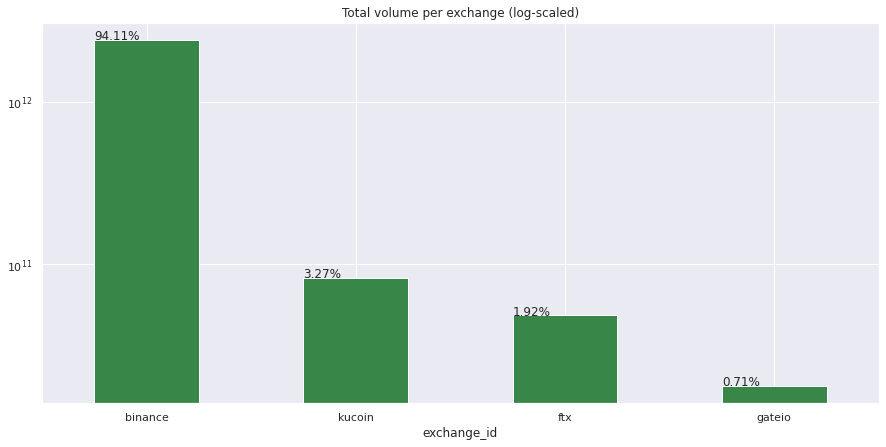

In [15]:
total_volume_by_exchange = ramccvol.get_total_exchange_volume(
    cumul_daily_volume, config, avg_daily=False
)
print(total_volume_by_exchange)

# Compute total volume per currency

currency_pair
DOGE_USDT    2.028113e+12
ADA_USDT     3.799003e+11
XRP_USDT     3.373964e+10
BTC_USDT     2.721635e+10
EOS_USDT     2.108020e+10
ETH_USDT     1.987232e+10
LINK_USDT    1.032276e+10
BNB_USDT     7.497324e+09
SOL_USDT     5.676692e+09
AVAX_USDT    1.719184e+09
FIL_USDT     1.025431e+09
Name: volume, dtype: float64


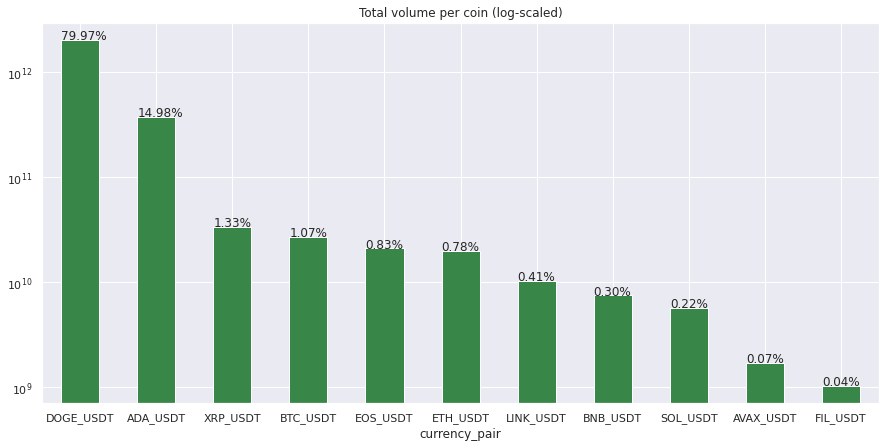

In [16]:
total_volume_by_coins = ramccvol.get_total_coin_volume(
    cumul_daily_volume, config, avg_daily=False
)
print(total_volume_by_coins)

# Rolling Plots

## By exchange

     exchange_id        date        volume  rolling_volume
0        binance  2018-08-17  2.521288e+08             NaN
1        binance  2018-08-18  2.246712e+08             NaN
2        binance  2018-08-19  1.291545e+08             NaN
3        binance  2018-08-20  1.486169e+08             NaN
4        binance  2018-08-21  1.446853e+08             NaN
...          ...         ...           ...             ...
2884      kucoin  2021-09-12  1.775510e+08    2.216194e+08
2885      kucoin  2021-09-13  2.185123e+08    2.228929e+08
2886      kucoin  2021-09-14  1.307721e+08    2.229035e+08
2887      kucoin  2021-09-15  9.324934e+07    2.231061e+08
2888      kucoin  2021-09-16  7.628892e+02    2.218036e+08

[2889 rows x 4 columns]


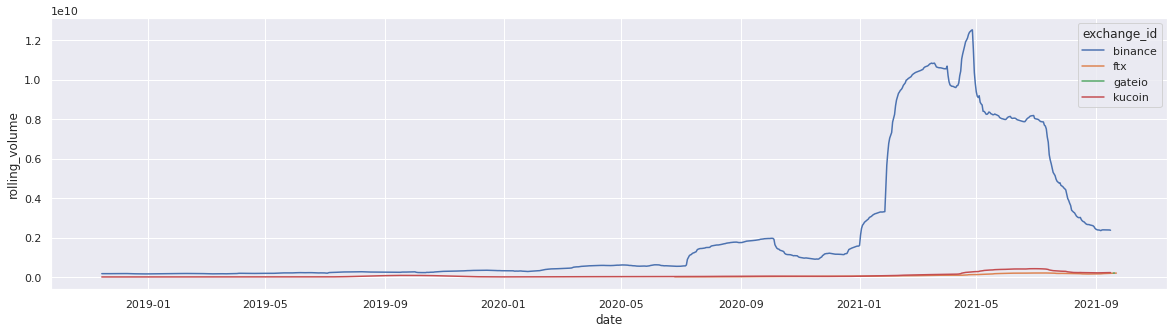

In [17]:
rolling_volume_per_exchange = ramccvol.get_rolling_volume_per_exchange(
    cumul_daily_volume, config, window=90
)
print(rolling_volume_per_exchange)

## By coins

     currency_pair        date        volume  rolling_volume
0         ADA_USDT  2018-08-17  2.340813e+08             NaN
1         ADA_USDT  2018-08-18  2.138980e+08             NaN
2         ADA_USDT  2018-08-19  1.237760e+08             NaN
3         ADA_USDT  2018-08-20  1.352677e+08             NaN
4         ADA_USDT  2018-08-21  1.323278e+08             NaN
...            ...         ...           ...             ...
9596      XRP_USDT  2021-09-17  2.291351e+07    9.365293e+07
9597      XRP_USDT  2021-09-18  1.327311e+07    9.321155e+07
9598      XRP_USDT  2021-09-19  1.421631e+07    9.210419e+07
9599      XRP_USDT  2021-09-20  4.984011e+07    9.102911e+07
9600      XRP_USDT  2021-09-21  1.155732e+07    8.979937e+07

[9601 rows x 4 columns]


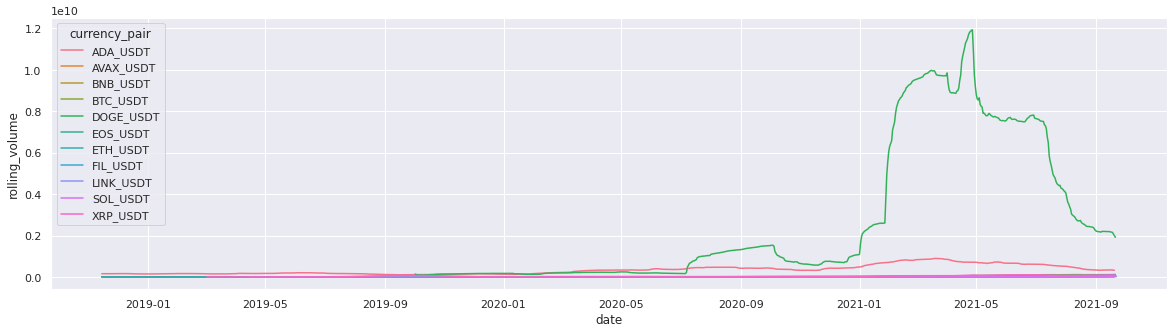

In [18]:
rolling_volume_per_coin = ramccvol.get_rolling_volume_per_coin(
    cumul_daily_volume, config, window=90
)
print(rolling_volume_per_coin)

# Compare weekday volumes

weekday
Thursday     4.302185e+11
Friday       4.187045e+11
Sunday       3.646112e+11
Saturday     3.525566e+11
Wednesday    3.441182e+11
Monday       3.256644e+11
Tuesday      3.002901e+11
Name: volume, dtype: float64


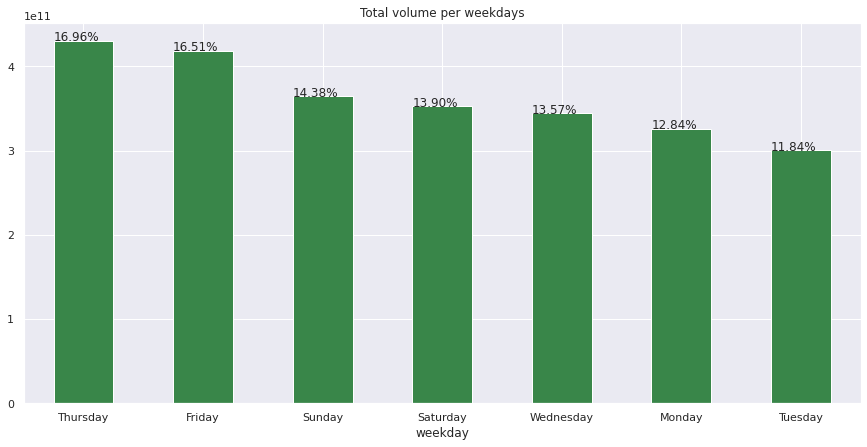

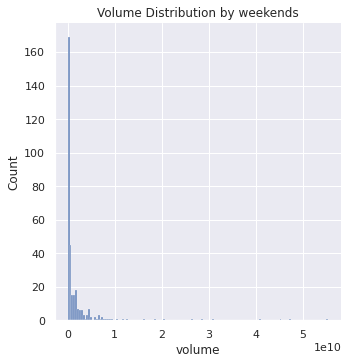

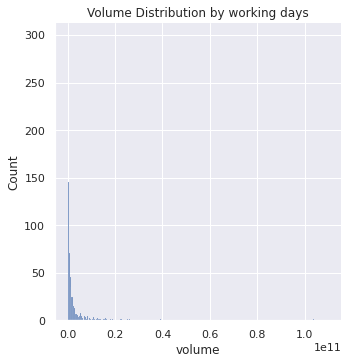

In [19]:
total_volume_by_weekdays = ramccvol.compare_weekday_volumes(
    cumul_daily_volume, config
)
print(total_volume_by_weekdays)

# Compare ATH volumes

## Functions

In [20]:
def get_initial_df_with_volumes(coins, exchange, is_notional_volume):
    """
    Return DataFrame with the volume of all coins for exchange with initial timestamps
    Parameters: list of coins, exchange name
    """
    result = []
    vendor = config["data"]["vendor"]
    universe_version = "v3"
    resample_1min = True
    root_dir = config["load"]["data_dir"]
    extension = "csv.gz"
    ccxt_csv_client = icdcl.CcxtCddCsvParquetByAssetClient(
        vendor,
        universe_version,
        resample_1min,
        root_dir,
        extension,
        aws_profile=config["load"]["aws_profile"],
    )
    for coin in coins:
        # TODO(Grisha): use `FullSymbols` #587.
        full_symbol = f"{exchange}::{coin}"
        start_ts = None
        end_ts = None
        df = ccxt_csv_client.read_data(
            [full_symbol],
            start_ts,
            end_ts,
        )
        if is_notional_volume:
            df["volume"] = df["volume"] * df["close"]
        result.append(df["volume"])
    final_result = pd.concat(result, axis=1)
    return final_result


def plot_ath_volumes_comparison(df_list):
    """
    Return the graph with the comparison of average minute total trading volume
    in ATH vs.

    non-ATH
    Parameters: dataframe with volumes from a given exchange
    """
    plot_df = []
    for df in df_list:
        df_ath = df.iloc[df.index.indexer_between_time("09:30", "16:00")]
        df_not_ath = df.loc[~df.index.isin(df_ath.index)]
        ath_stat = pd.DataFrame()
        ath_stat.loc[df.name, f"minute_avg_total_volume_ath_{df.name}"] = (
            df_ath.sum().sum() / df_ath.shape[0]
        )
        ath_stat.loc[df.name, f"minute_avg_total_volume_not_ath_{df.name}"] = (
            df_not_ath.sum().sum() / df_not_ath.shape[0]
        )
        plot_df.append(ath_stat)
    plot_df = pd.concat(plot_df)
    plot_df.plot.bar(figsize=(15, 7), logy=True)

## Load the data

In [21]:
# get the list of all coin paires for each exchange
binance_coins = ivcu.get_vendor_universe("CCXT", version="v3")["binance"]
ftx_coins = ivcu.get_vendor_universe("CCXT", version="v3")["ftx"]
gateio_coins = ivcu.get_vendor_universe("CCXT", version="v3")["gateio"]
kucoin_coins = ivcu.get_vendor_universe("CCXT", version="v3")["kucoin"]

# load all the dataframes
binance_1 = get_initial_df_with_volumes(
    binance_coins, "binance", is_notional_volume=True
)
ftx_1 = get_initial_df_with_volumes(ftx_coins, "ftx", is_notional_volume=True)
gateio_1 = get_initial_df_with_volumes(
    gateio_coins, "gateio", is_notional_volume=True
)
kucoin_1 = get_initial_df_with_volumes(
    kucoin_coins, "kucoin", is_notional_volume=True
)

# supportive variables
exchange_list = [binance_1, ftx_1, gateio_1, kucoin_1]
binance_1.name = "binance"
ftx_1.name = "ftx"
gateio_1.name = "gateio"
kucoin_1.name = "kucoin"

Reading CCXT data for exchange id='binance', currencies='ADA_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/ADA_USDT.csv.gz'...
Removed 48775 / 1617480 = 3.02% rows
Index length increased by 53295 = 1622000 - 1568705
Reading CCXT data for exchange id='binance', currencies='AVAX_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/AVAX_USDT.csv.gz'...
Removed 26890 / 516274 = 5.21% rows
Index length increased by 28114 = 517498 - 489384
Reading CCXT data for exchange id='binance', currencies='BNB_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/BNB_USDT.csv.gz'...
Removed 1253 / 1617775 = 0.08% rows
Index length increased by 5773 = 1622295 - 1616522
Reading CCXT data for exchange id='binance', currencies='BTC_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/BTC_USDT.csv.gz'...
Removed 210 / 1615122 = 0.01% rows
Index length increased by 4729 = 1619641 - 1614912
Reading CCXT data for exchange id='binance', currencies='DOGE_USDT

Removed 2729 / 60509 = 4.51% rows
Index length increased by 2729 = 60509 - 57780
Reading CCXT data for exchange id='kucoin', currencies='XRP_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/XRP_USDT.csv.gz'...
Removed 196131 / 1357381 = 14.45% rows
Index length increased by 303138 = 1464388 - 1161250


## Plot

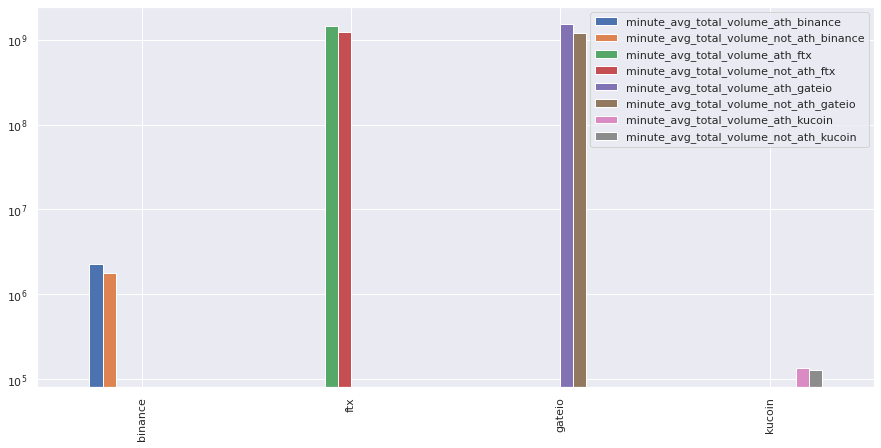

In [22]:
plot_ath_volumes_comparison(exchange_list)